# 4 Preprocessing<a id='4_Preprocessing'></a>
Justin Jimenez 1/19/2022

The objective of this notebook was to preprocess the data in preparation for modelling.

# 4.1 Contents<a id='4.1_Contents'></a>
* [4 Preprocessing](#4_Preprocessing)
  * [4.1 Contents](#4.1_Contents)
  * [4.2 Importing](#4.2_Importing)
  * [4.3 One Hot Encoding](#4.3_One_Host_Encoding)
  * [4.4 Train Test Split](#4.4_Train_Test_Split)
  * [4.5 SMOTEENN](#4.5_SMOTEENN)
  * [4.6 Standardization](#4.6_Standardization)
  * [4.7 Exporting](#4.7_Exporting)
  
      
# 4.2 Importing<a id='4.2_Importing'></a>

In [1]:
import pandas as pd
import numpy as np
import bamboolib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from imblearn.combine import SMOTEENN

In [2]:
df = pd.read_csv(r'..\data\processed\loan_data_post_eda.csv')

Importing the data from the EDA step, we have 70 remaining features not including the target loan_status feature.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835925 entries, 0 to 835924
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_amnt                 835925 non-null  int64  
 1   term                      835925 non-null  int64  
 2   int_rate                  835925 non-null  float64
 3   installment               835925 non-null  int64  
 4   grade                     835925 non-null  object 
 5   sub_grade                 835925 non-null  object 
 6   emp_length                835925 non-null  object 
 7   home_ownership            835925 non-null  object 
 8   annual_inc                835925 non-null  int64  
 9   verification_status       835925 non-null  object 
 10  loan_status               835925 non-null  object 
 11  purpose                   835925 non-null  object 
 12  dti                       835925 non-null  int64  
 13  delinq_2yrs               835925 non-null  i

The application of this model is that it will utilize user-provided data in order to predict if they are likely to default. Most of these features can only be acquired through a hard credit check and it is unlikely that a user will know or have easy access to this information. Therefore many of these features were dropped for impracticality.

In [4]:
# The following features were dropped for impracticality for this application. These features DID NOT have a significant
# impact on model performance.
df = df.drop(columns=['grade', 'sub_grade', 'hardship_flag', 'debt_settlement_flag', 
                     'term', 'verification_status', 'initial_list_status', 'application_type',
                     'pct_tl_nvr_dlq', 'num_tl_op_past_12m', 'num_tl_90g_dpd_24m', 'num_tl_30dpd', 'num_rev_accts',
                     'num_bc_tl', 'num_actv_rev_tl', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op',
                     'pub_rec', 'revol_bal', 'revol_util', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il',
                     'il_util', 'open_rv_12m', 'max_bal_bc', 'total_cu_tl', 'bc_util', 'delinq_amnt', 'mo_sin_old_il_acct',
                     'num_actv_bc_tl', 'num_accts_ever_120_pd', 'mo_sin_old_rev_tl_op', 'inq_fi', 'total_rev_hi_lim',
                     'mths_since_recent_bc', 'mths_since_rcnt_il',
                     'dti', 'open_acc', 'all_util', 'mort_acc',
                     'tot_cur_bal', 'inq_last_6mths'])
# The following features were dropped for impracticality for this application. These features DID have a significant
# impact on model performance. Including these features will cause leakage.
df = df.drop(columns=['out_prncp', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_d',
                     'total_pymnt'])
df

,loan_amnt,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,delinq_2yrs,earliest_cr_line,...,last_credit_pull_d,acc_now_delinq,inq_last_12m,chargeoff_within_12_mths,mths_since_recent_inq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,fico_avg
0,12000,0.0797,375,10+ years,OWN,42000,Non-Default,consolidation,0,312.700000,...,21.533333,0,2,0,8,1,0,57180,30502,717.0
1,10000,0.0944,320,3 years,MORTGAGE,55000,Non-Default,consolidation,0,200.066667,...,30.666667,0,1,0,8,1,0,315034,216375,697.0
2,15000,0.1359,509,4 years,MORTGAGE,180000,Non-Default,medical,0,550.100000,...,41.800000,0,0,0,13,0,0,769704,297447,682.0
3,40000,0.0797,810,10+ years,OWN,200000,Default,house,0,213.266667,...,33.733333,0,7,0,1,0,0,413719,354714,762.0
4,18000,0.1602,437,< 1 year,RENT,125000,Non-Default,credit_card,2,187.900000,...,32.700000,0,2,0,5,0,0,91737,57941,677.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835920,24000,0.2399,690,< 1 year,RENT,107000,Default,other,3,326.933333,...,21.533333,0,2,1,4,1,1,103322,60812,672.0
835921,10000,0.0799,313,10+ years,MORTGAGE,65000,Non-Default,consolidation,1,346.166667,...,28.633333,0,0,0,17,0,0,132303,55863,727.0
835922,10050,0.1699,358,8 years,RENT,37000,Default,consolidation,0,350.266667,...,27.600000,0,1,0,2,0,0,30400,14300,707.0
835923,6000,0.1144,197,5 years,RENT,41000,Non-Default,credit_card,1,386.800000,...,23.566667,1,3,0,10,0,0,47476,26201,672.0


This removed 50 features, leaving 21 including the target.

In [5]:
# Remove observations where the annual income is not reported.
df = df.loc[~(df['annual_inc'] == 0)]

# Feature engineer surrogate value for total DTI
df['tot_bal_income_ratio'] = (df.total_bal_ex_mort / df.annual_inc) * 100

# Feature engineer surrogate value for total utilization rate
df['tot_bal_tot_hi_cred_lim_ratio'] = (df.total_bal_ex_mort / df.tot_hi_cred_lim) * 100
df

,loan_amnt,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,purpose,delinq_2yrs,earliest_cr_line,...,inq_last_12m,chargeoff_within_12_mths,mths_since_recent_inq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,fico_avg,tot_bal_income_ratio,tot_bal_tot_hi_cred_lim_ratio
0,12000,0.0797,375,10+ years,OWN,42000,Non-Default,consolidation,0,312.700000,...,2,0,8,1,0,57180,30502,717.0,72.623810,53.343827
1,10000,0.0944,320,3 years,MORTGAGE,55000,Non-Default,consolidation,0,200.066667,...,1,0,8,1,0,315034,216375,697.0,393.409091,68.683063
2,15000,0.1359,509,4 years,MORTGAGE,180000,Non-Default,medical,0,550.100000,...,0,0,13,0,0,769704,297447,682.0,165.248333,38.644336
3,40000,0.0797,810,10+ years,OWN,200000,Default,house,0,213.266667,...,7,0,1,0,0,413719,354714,762.0,177.357000,85.737904
4,18000,0.1602,437,< 1 year,RENT,125000,Non-Default,credit_card,2,187.900000,...,2,0,5,0,0,91737,57941,677.0,46.352800,63.159903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835920,24000,0.2399,690,< 1 year,RENT,107000,Default,other,3,326.933333,...,2,1,4,1,1,103322,60812,672.0,56.833645,58.856778
835921,10000,0.0799,313,10+ years,MORTGAGE,65000,Non-Default,consolidation,1,346.166667,...,0,0,17,0,0,132303,55863,727.0,85.943077,42.223532
835922,10050,0.1699,358,8 years,RENT,37000,Default,consolidation,0,350.266667,...,1,0,2,0,0,30400,14300,707.0,38.648649,47.039474
835923,6000,0.1144,197,5 years,RENT,41000,Non-Default,credit_card,1,386.800000,...,3,0,10,0,0,47476,26201,672.0,63.904878,55.187884


Text(0.5, 1.0, 'Credit Utilization by Loan Status')

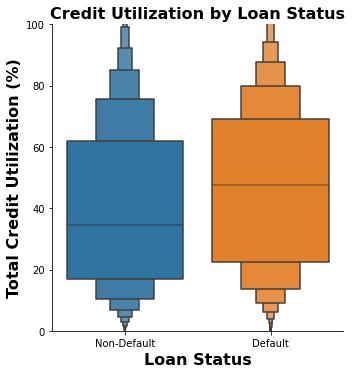

In [6]:
sns.catplot(x = 'loan_status', y = 'tot_bal_tot_hi_cred_lim_ratio', data = df, kind = 'boxen')
plt.ylim(0, 100)
plt.xlabel('Loan Status', size = 16, weight = 600)
plt.ylabel('Total Credit Utilization (%)', size = 16, weight = 600)
plt.title('Credit Utilization by Loan Status', size = 16, weight = 600)

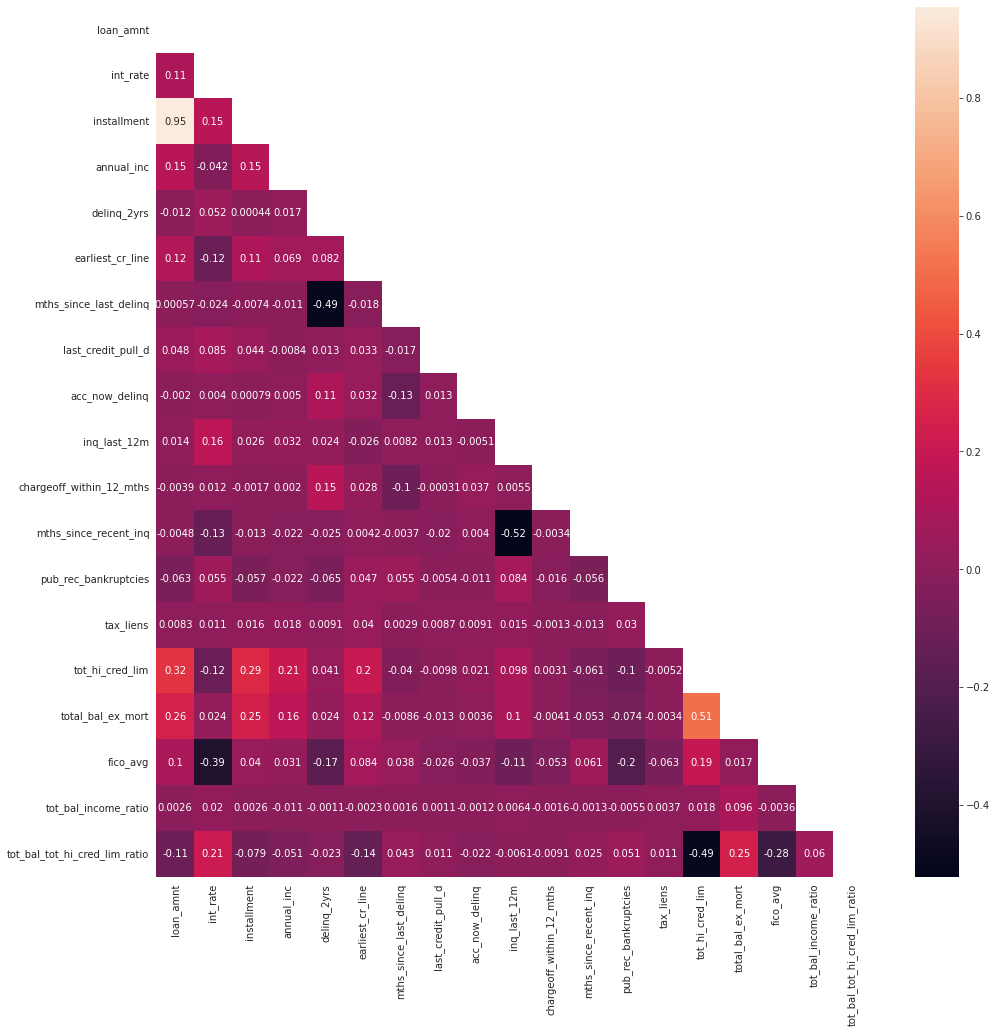

In [7]:
# Visualize the correlation for remaining features to check for multicollinearity
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16, 16))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, annot=True)

# 4.3 One Hot Encoding<a id='4.3_One_Hot_Encoding'></a>

There are several categorical variables that need to be encoded. Most of these features are not highly cardinal, so One Hot Encoding is acceptable.

In [8]:
df = pd.get_dummies(df, drop_first = True).dropna()
df

,loan_amnt,int_rate,installment,annual_inc,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,last_credit_pull_d,acc_now_delinq,inq_last_12m,...,purpose_car,purpose_consolidation,purpose_credit_card,purpose_energy,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_vacation
0,12000,0.0797,375,42000,0,312.700000,33,21.533333,0,2,...,0,1,0,0,0,0,0,0,0,0
1,10000,0.0944,320,55000,0,200.066667,68,30.666667,0,1,...,0,1,0,0,0,0,0,0,0,0
2,15000,0.1359,509,180000,0,550.100000,33,41.800000,0,0,...,0,0,0,0,0,0,1,0,0,0
3,40000,0.0797,810,200000,0,213.266667,43,33.733333,0,7,...,0,0,0,0,1,0,0,0,0,0
4,18000,0.1602,437,125000,2,187.900000,14,32.700000,0,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835920,24000,0.2399,690,107000,3,326.933333,4,21.533333,0,2,...,0,0,0,0,0,0,0,0,1,0
835921,10000,0.0799,313,65000,1,346.166667,12,28.633333,0,0,...,0,1,0,0,0,0,0,0,0,0
835922,10050,0.1699,358,37000,0,350.266667,65,27.600000,0,1,...,0,1,0,0,0,0,0,0,0,0
835923,6000,0.1144,197,41000,1,386.800000,0,23.566667,1,3,...,0,0,1,0,0,0,0,0,0,0


In [9]:
# Create a column that is the opposite of loan_status_Non-Default to make 1 the positive class
df['loan_status_default'] = ~df['loan_status_Non-Default'] - 254
df = df.drop(columns = ['loan_status_Non-Default'])
df

,loan_amnt,int_rate,installment,annual_inc,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,last_credit_pull_d,acc_now_delinq,inq_last_12m,...,purpose_consolidation,purpose_credit_card,purpose_energy,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_vacation,loan_status_default
0,12000,0.0797,375,42000,0,312.700000,33,21.533333,0,2,...,1,0,0,0,0,0,0,0,0,0
1,10000,0.0944,320,55000,0,200.066667,68,30.666667,0,1,...,1,0,0,0,0,0,0,0,0,0
2,15000,0.1359,509,180000,0,550.100000,33,41.800000,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40000,0.0797,810,200000,0,213.266667,43,33.733333,0,7,...,0,0,0,1,0,0,0,0,0,1
4,18000,0.1602,437,125000,2,187.900000,14,32.700000,0,2,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835920,24000,0.2399,690,107000,3,326.933333,4,21.533333,0,2,...,0,0,0,0,0,0,0,1,0,1
835921,10000,0.0799,313,65000,1,346.166667,12,28.633333,0,0,...,1,0,0,0,0,0,0,0,0,0
835922,10050,0.1699,358,37000,0,350.266667,65,27.600000,0,1,...,1,0,0,0,0,0,0,0,0,1
835923,6000,0.1144,197,41000,1,386.800000,0,23.566667,1,3,...,0,1,0,0,0,0,0,0,0,0


# 4.4 Train Test Split<a id='4.4_Train_Test_Split'></a>

In [10]:
X = df.drop(columns='loan_status_default')
y = df['loan_status_default']

In [11]:
# Split the data before resampling to avoid leakage.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
y_test

622948    0
364093    0
165280    0
2249      0
203888    0
         ..
298705    0
358870    0
712676    0
785845    0
263911    0
Name: loan_status_default, Length: 167185, dtype: uint8

# 4.5 SMOTEENN<a id='4.5_SMOTEENN'></a>

The original sample is highly imbalanced with about 80% non-default and 20% default (excluding current loans). In order to improve model recall scores, the data was resampled using a random undersampler and a SMOTE Edited Nearest Neighbor sampler, which is a combination of oversampling and undersampling.

In [13]:
smt = SMOTEENN(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)

# 4.6 Standardization<a id='4.6_Standardization'></a>

The resampled data was split and standardized on the training set.

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4.7 Exporting<a id='4.7_Exporting'></a>

## X Data

In [15]:
# save the X_final data to a new csv file
datapath = r'..\data\processed\X_final.csv'

X.to_csv(datapath, index = False)

In [16]:
# save the X_train data to a new csv file
datapath = r'..\data\processed\X_train.csv'

pd.DataFrame(X_train, columns = X.columns).to_csv(datapath, index = False)

In [17]:
# save the X_test data to a new csv file
datapath = r'..\data\processed\X_test.csv'

pd.DataFrame(X_test, columns = X.columns).to_csv(datapath, index = False)

In [18]:
# save the X_train data to a new csv file
datapath = r'..\data\processed\X_final.csv'

X.to_csv(datapath, index = False)

## Y Data

In [19]:
# save the y_final data to a new csv file
datapath = r'..\data\processed\y_final.csv'

y.to_csv(datapath, index = False)

In [20]:
# save the y_train data to a new csv file
datapath = r'..\data\processed\y_train.csv'

pd.DataFrame(y_train, columns = ['loan_status_default']).to_csv(datapath, index = False)

In [21]:
# save the y_test data to a new csv file
datapath = r'..\data\processed\y_test.csv'

pd.DataFrame(y_test, columns = ['loan_status_default']).to_csv(datapath, index = False)